<a href="https://colab.research.google.com/github/tmoura/softexIA/blob/main/DadosDesbalanceados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
url = "https://raw.githubusercontent.com/tmoura/machinelearning/master/datasets/bank-full.csv"

dados = pd.read_csv(url,sep=',')
# dados = pd.read_csv(io.BytesIO(uploaded['bank-full.csv']),sep=';')

In [6]:
dados.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
dados

In [ ]:
dados.info()


In [10]:
dados["default"] = dados["default"].map({"no":0,"yes":1})
dados["housing"] = dados["housing"].map({"no":0,"yes":1})
dados["loan"] = dados["loan"].map({"no":0,"yes":1})
dados["Target"] = dados["Target"].map({"no":0,"yes":1})
dados.education = dados.education.map({"primary": 0, "secondary":1, "tertiary":2})
dados.poutcome = dados.poutcome.map({"unknown": 0, "failure":1, "other":2, "success":3})
dados.contact = dados.contact.map({"cellular": 0, "unknown":1, "telephone":2})
dados.month = pd.to_datetime(dados.month, format = "%b").dt.month

In [11]:
dados.isnull().sum()

age              0
job              0
marital          0
education     1857
default      45211
balance          0
housing      45211
loan         45211
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
Target           0
dtype: int64

In [14]:
dados.Target.value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [ ]:
dados.dropna(inplace = True)

In [ ]:
dados.y.value_counts()

In [ ]:
dados.head()

In [ ]:
# Transformação das colunas restantes em numéricas: cada string única é transformada em uma coluna, se o registro existir para aquela coluna ela recebe 1 e zero para as demais colunas.
dados = pd.get_dummies(dados)
dados.head().T

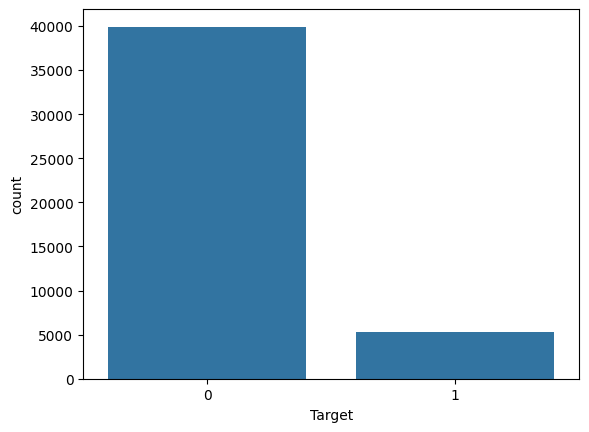

In [18]:
dados.Target.value_counts()
ax = sns.countplot(x="Target", data=dados)

In [ ]:
# Instanciando um algoritmo de classificação

lrmodelo = LogisticRegression(max_iter=3000)

In [ ]:
X = dados.drop("y", axis = 1)
X

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,2.0,0,2143,1,0,1,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,1.0,0,29,1,0,1,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,1.0,0,2,1,1,1,5,5,76,...,0,0,0,0,0,0,0,0,1,0
5,35,2.0,0,231,1,0,1,5,5,139,...,0,0,0,0,0,0,0,0,1,0
6,28,2.0,0,447,1,1,1,5,5,217,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2.0,0,825,0,0,0,17,11,977,...,0,0,0,0,1,0,0,0,1,0
45207,71,0.0,0,1729,0,0,0,17,11,456,...,1,0,0,0,0,0,0,1,0,0
45208,72,1.0,0,5715,0,0,0,17,11,1127,...,1,0,0,0,0,0,0,0,1,0
45209,57,1.0,0,668,0,0,2,17,11,508,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y = dados.y
y

0        0
1        0
2        0
5        0
6        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 43354, dtype: int64

In [ ]:
# Separando dados de treino e de teste, usando o padrão de 70-30

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [ ]:
# Treinando o algoritmo

lrmodelo.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [ ]:
y_pred = lrmodelo.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8993449580219578

In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      9580
           1       0.65      0.29      0.40      1259

    accuracy                           0.90     10839
   macro avg       0.78      0.63      0.67     10839
weighted avg       0.88      0.90      0.88     10839



In [ ]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0         9388  192   9580
1          899  360   1259
All      10287  552  10839


In [ ]:
# Vamos balancear usando primeiro o undersampling

In [ ]:
nr = NearMiss()

In [ ]:
X,y = nr.fit_resample(X,y)

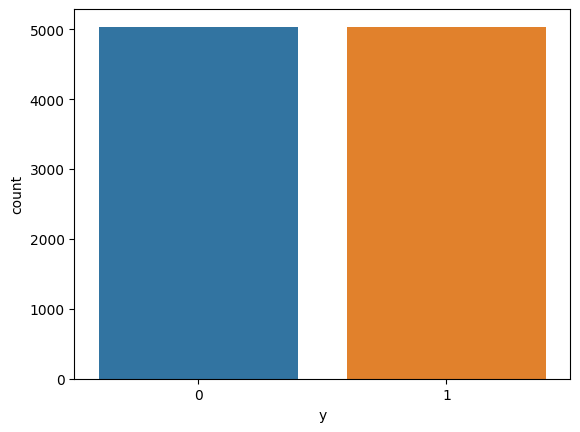

In [ ]:
ax = sns.countplot(x=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [ ]:
lrmodelo2 = LogisticRegression(max_iter=2000)

In [ ]:
# Treinando o algoritmo

lrmodelo2.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
y_pred = lrmodelo2.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8785232235013894

In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1259
           1       0.91      0.85      0.87      1260

    accuracy                           0.88      2519
   macro avg       0.88      0.88      0.88      2519
weighted avg       0.88      0.88      0.88      2519



In [ ]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1148   111  1259
1         195  1065  1260
All      1343  1176  2519


In [ ]:
# Vamos testar o SMOTE

In [ ]:
X = dados.drop("y", axis = 1)
y = dados.y

In [ ]:
np.bincount(y)

array([38317,  5037])

In [ ]:
smt = SMOTE()

In [ ]:
# X, y = smt.fit_sample(X, y)

In [ ]:
np.bincount(y)

array([38317,  5037])

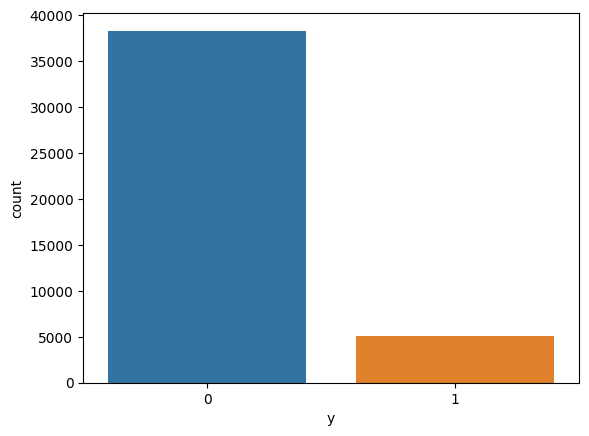

In [ ]:
ax = sns.countplot(x=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [ ]:
lrmodelo3 = LogisticRegression(max_iter=2500)

In [ ]:
lrmodelo3.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2500)

In [ ]:
y_pred = lrmodelo3.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8114724150529777

In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      9579
           1       0.82      0.80      0.81      9580

    accuracy                           0.81     19159
   macro avg       0.81      0.81      0.81     19159
weighted avg       0.81      0.81      0.81     19159

